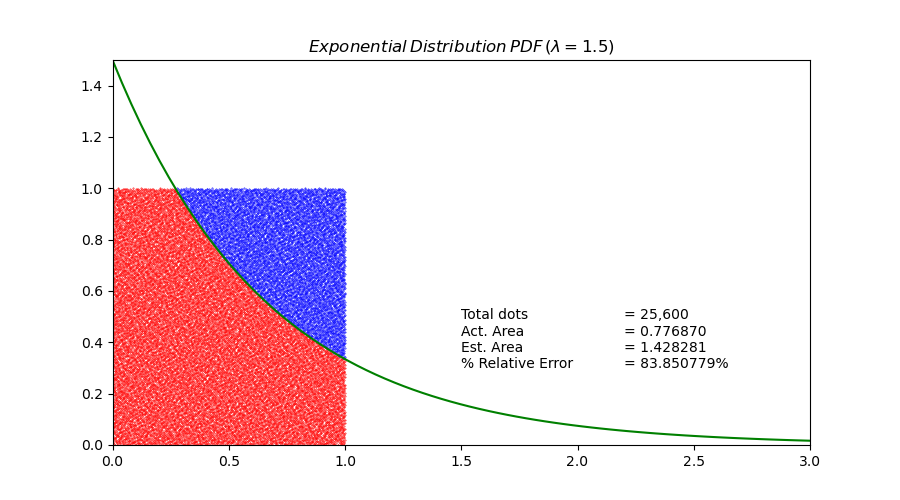

In [6]:
# mc_exp_dist.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
from numba import float64, int32, vectorize
from numpy.random import default_rng

rate_param = 1.5
sample_area = Rectangle((0,0), 1, 2)

@vectorize([float64(float64)], nopython=True)
# Defining our the PDF and CDF
def pdf(x):
    return rate_param * np.exp(-rate_param * x)

def cdf(x):
    return 1 - np.exp(-rate_param * x)

@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

    
def plot(ax):
    iterations_sqrt = 160
    iterations = iterations_sqrt ** 2
    
    primes = [2, 3]
    
    # Scaling our x and y values
    x = (sample_area.get_x() + halton(np.arange(iterations), primes[0]) * sample_area.get_width())
    y = (sample_area.get_y() + halton(np.arange(iterations), primes[1]) * sample_area.get_width())
    
    # Actual minus random y value
    d = pdf(x) - y
    
    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]
    
    x_out = x[d < 0.0]
    y_out = y[d < 0.0]
    
    # Plotting our estimation points and displaying them at the size of 1 pixel
    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)
    
    # Plotting actual function
    act_x = np.linspace(0, 4, 100)
    act_y = pdf(act_x)
    ax.plot(act_x, act_y, color='green')
    
    # Calculating actual and estimated area
    est_area = ((np.count_nonzero(d >= 0.0) / iterations) * (sample_area.get_width() * sample_area.get_height()))
    act_area = cdf(sample_area.get_x() + sample_area.get_width()) - cdf(sample_area.get_x())
    
    # Calculating percent realtive error
    error = abs((est_area - act_area)) / act_area
    
    ax.set_title(f"$Exponential\,Distribution\,PDF\,(\lambda = {rate_param})$")
    ax.set_xlim(0, 3.0)
    ax.set_ylim(0, 1.5)
    
    ax.text(1.5, 0.3, "Total dots\nAct. Area\n" "Est. Area\n% Relative Error", ha="left",)
    ax.text(2.2, 0.3, f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {error:.6%}",)
    
def main():
    plt.close("all")
    fig = plt.figure(" ")
    fig.set_size_inches(9, 5)
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()
    
main()